## Description

- This project will focus on exploratory data analysis on crime in Vancouver British Columbia
- Dataset taken from: https://www.kaggle.com/datasets/tcashion/vancouver-bc-crime-dataset/

Import Libraries

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

Read in dataset

In [22]:
df = pd.read_csv("crimedata.csv")

In [23]:
df.head()

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
0,Break and Enter Commercial,2012,12,14,8,52,NaN,Oakridge,491285.0000,5.453433e+06
1,Break and Enter Commercial,2019,3,7,2,6,10XX SITKA SQ,Fairview,490612.9648,5.457110e+06
2,Break and Enter Commercial,2019,8,27,4,12,10XX ALBERNI ST,West End,491004.8164,5.459177e+06
3,Break and Enter Commercial,2021,4,26,4,44,10XX ALBERNI ST,West End,491007.7798,5.459174e+06
4,Break and Enter Commercial,2014,8,8,5,13,10XX ALBERNI ST,West End,491015.9434,5.459166e+06


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881242 entries, 0 to 881241
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TYPE           881242 non-null  object 
 1   YEAR           881242 non-null  int64  
 2   MONTH          881242 non-null  int64  
 3   DAY            881242 non-null  int64  
 4   HOUR           881242 non-null  int64  
 5   MINUTE         881242 non-null  int64  
 6   HUNDRED_BLOCK  881230 non-null  object 
 7   NEIGHBOURHOOD  881099 non-null  object 
 8   X              881167 non-null  float64
 9   Y              881167 non-null  float64
dtypes: float64(2), int64(5), object(3)
memory usage: 67.2+ MB


In [25]:
df.describe()

,YEAR,MONTH,DAY,HOUR,MINUTE,X,Y
count,881242.000000,881242.000000,881242.000000,881242.000000,881242.000000,881167.000000,8.811670e+05
mean,2012.280981,6.522766,15.384418,12.310825,15.863388,448947.150399,4.977180e+06
std,6.192852,3.393490,8.753394,7.464861,18.361709,139392.826517,1.545107e+06
min,2003.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,2007.000000,4.000000,8.000000,7.000000,0.000000,490187.175900,5.454209e+06
50%,2012.000000,7.000000,15.000000,14.000000,5.000000,491569.941200,5.457169e+06
75%,2018.000000,9.000000,23.000000,18.000000,30.000000,493380.107600,5.458718e+06
max,2023.000000,12.000000,31.000000,23.000000,59.000000,511303.000000,5.512579e+06


The date range for the dataset will be from year 2003 to 2023.

## Cleaning and Transforming Data

In [26]:
# 1. Convert date to datetime 
# Date (yyyy-mm-dd h:m)
df["date"] = df['YEAR'].astype(str) + "-" + df["MONTH"].astype(str) + "-" + df["DAY"].astype(str)
df["date"] = pd.to_datetime(df["date"],format= "%Y-%m-%d")
# Time
df["timestamp"] = df['HOUR'].astype(str) + ":" + df["MINUTE"].astype(str)
# Datetime
df["datetime"] = df["date"].astype(str) + " " + df["timestamp"]
df["datetime"] = pd.to_datetime(df["datetime"], format = "%Y-%m-%d %H:%M")

In [27]:
# 2. Transforming hours to 4 categories 
# 6-12 = MORNING , 12 - 18 = AFTERNOON , 18 - 24 = EVENING , 24 TO 6 = OVERNIGHT 
df['period_of_day'] = df["HOUR"].apply(lambda date: "Morning" if 0 <= date <= 6 
                                       else "Afternoon" if 7 <= date <= 12 
                                       else "Evening" if 13 <= date <= 18  
                                       else "Midnight")

In [28]:
# 3. One Hot encode Categorical Variable for period_of_day (this might be used later for prediction / ML)
df = pd.get_dummies(df, columns=['period_of_day'])
# need to rerun the code block above since pd.get_dummies removes the current variable

In [29]:
# From the variables below we see that the missing data comes from X Y NEIGHBOURHOOD
df[df.isnull().values].count()

TYPE                       305
YEAR                       305
MONTH                      305
DAY                        305
HOUR                       305
MINUTE                     305
HUNDRED_BLOCK              293
NEIGHBOURHOOD               12
X                           80
Y                           80
date                       305
timestamp                  305
datetime                   305
period_of_day_Afternoon    305
period_of_day_Evening      305
period_of_day_Midnight     305
period_of_day_Morning      305
dtype: int64

Add datemonth into dataframe

In [30]:
df["YearMonth"] = df['datetime'].map(lambda x: '{}-{}'.format(x.year,x.month))

Create new data frame for aggregation of YearMonth

In [31]:
df_yearmonth = df.groupby(['YearMonth']).count().reset_index()

In [32]:
df_yearmonth["total_crimes_commited"] = df_yearmonth.apply(lambda row: row['period_of_day_Afternoon']+row['period_of_day_Evening']+row['period_of_day_Midnight']+row['period_of_day_Morning'], axis=1)


In [33]:
df_yearmonth["YearMonth"] = pd.to_datetime(df_yearmonth["YearMonth"],format= "%Y-%m")

In [34]:
df_yearmonth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   YearMonth                251 non-null    datetime64[ns]
 1   TYPE                     251 non-null    int64         
 2   YEAR                     251 non-null    int64         
 3   MONTH                    251 non-null    int64         
 4   DAY                      251 non-null    int64         
 5   HOUR                     251 non-null    int64         
 6   MINUTE                   251 non-null    int64         
 7   HUNDRED_BLOCK            251 non-null    int64         
 8   NEIGHBOURHOOD            251 non-null    int64         
 9   X                        251 non-null    int64         
 10  Y                        251 non-null    int64         
 11  date                     251 non-null    int64         
 12  timestamp                251 non-nul

In [35]:
df_yearmonth

,YearMonth,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,date,timestamp,datetime,period_of_day_Afternoon,period_of_day_Evening,period_of_day_Midnight,period_of_day_Morning,total_crimes_commited
0,2003-01-01,5041,5041,5041,5041,5041,5041,5041,5040,5040,5040,5041,5041,5041,5041,5041,5041,5041,20164
1,2003-10-01,5228,5228,5228,5228,5228,5228,5228,5225,5227,5227,5228,5228,5228,5228,5228,5228,5228,20912
2,2003-11-01,4678,4678,4678,4678,4678,4678,4678,4676,4676,4676,4678,4678,4678,4678,4678,4678,4678,18712
3,2003-12-01,4580,4580,4580,4580,4580,4580,4580,4580,4580,4580,4580,4580,4580,4580,4580,4580,4580,18320
4,2003-02-01,4245,4245,4245,4245,4245,4245,4245,4244,4245,4245,4245,4245,4245,4245,4245,4245,4245,16980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,2023-05-01,3107,3107,3107,3107,3107,3107,3107,3107,3107,3107,3107,3107,3107,3107,3107,3107,3107,12428
247,2023-06-01,3320,3320,3320,3320,3320,3320,3320,3320,3320,3320,3320,3320,3320,3320,3320,3320,3320,13280
248,2023-07-01,3334,3334,3334,3334,3334,3334,3334,3333,3334,3334,3334,3334,3334,3334,3334,3334,3334,13336
249,2023-08-01,3422,3422,3422,3422,3422,3422,3422,3421,3422,3422,3422,3422,3422,3422,3422,3422,3422,13688


In [36]:
df['period_of_day'] = df["HOUR"].apply(lambda date: "Morning" if 0 <= date <= 6 
                                       else "Afternoon" if 7 <= date <= 12 
                                       else "Evening" if 13 <= date <= 18  
                                       else "Midnight")

In [37]:
df_yearmonth2 = df.groupby(["YEAR",'TYPE'])['period_of_day'].count().reset_index()

In [38]:
df_yearmonth2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   YEAR           231 non-null    int64 
 1   TYPE           231 non-null    object
 2   period_of_day  231 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 5.5+ KB


In [39]:
df_yearmonth2

,YEAR,TYPE,period_of_day
0,2003,Break and Enter Commercial,3196
1,2003,Break and Enter Residential/Other,6884
2,2003,Homicide,17
3,2003,Mischief,6387
4,2003,Offence Against a Person,3510
...,...,...,...
226,2023,Theft from Vehicle,6686
227,2023,Theft of Bicycle,967
228,2023,Theft of Vehicle,684
229,2023,Vehicle Collision or Pedestrian Struck (with F...,15


In [40]:
#df.drop(labels = 'count',axis = 1,inplace = True)

Convert X and Y coordinates to Longitude and Latitude

In [41]:
from pyproj import Transformer
transformer = Transformer.from_crs("EPSG:32610", "EPSG:4326") # use this one
new = transformer.transform(df['X'],df['Y']) 
df['Latitude'] = new[0]
df['Longitude'] = new[1]

In [42]:
df.head()

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,...,timestamp,datetime,period_of_day_Afternoon,period_of_day_Evening,period_of_day_Midnight,period_of_day_Morning,YearMonth,period_of_day,Latitude,Longitude
0,Break and Enter Commercial,2012,12,14,8,52,NaN,Oakridge,491285.0000,5.453433e+06,...,8:52,2012-12-14 08:52:00,1,0,0,0,2012-12,Afternoon,49.233614,-123.119712
1,Break and Enter Commercial,2019,3,7,2,6,10XX SITKA SQ,Fairview,490612.9648,5.457110e+06,...,2:6,2019-03-07 02:06:00,0,0,0,1,2019-3,Morning,49.266678,-123.129029
2,Break and Enter Commercial,2019,8,27,4,12,10XX ALBERNI ST,West End,491004.8164,5.459177e+06,...,4:12,2019-08-27 04:12:00,0,0,0,1,2019-8,Morning,49.285281,-123.123690
3,Break and Enter Commercial,2021,4,26,4,44,10XX ALBERNI ST,West End,491007.7798,5.459174e+06,...,4:44,2021-04-26 04:44:00,0,0,0,1,2021-4,Morning,49.285255,-123.123649
4,Break and Enter Commercial,2014,8,8,5,13,10XX ALBERNI ST,West End,491015.9434,5.459166e+06,...,5:13,2014-08-08 05:13:00,0,0,0,1,2014-8,Morning,49.285181,-123.123536


## Exploratory Data Analysis

Timeseries

[Text(0.5, 0, 'Year Month')]

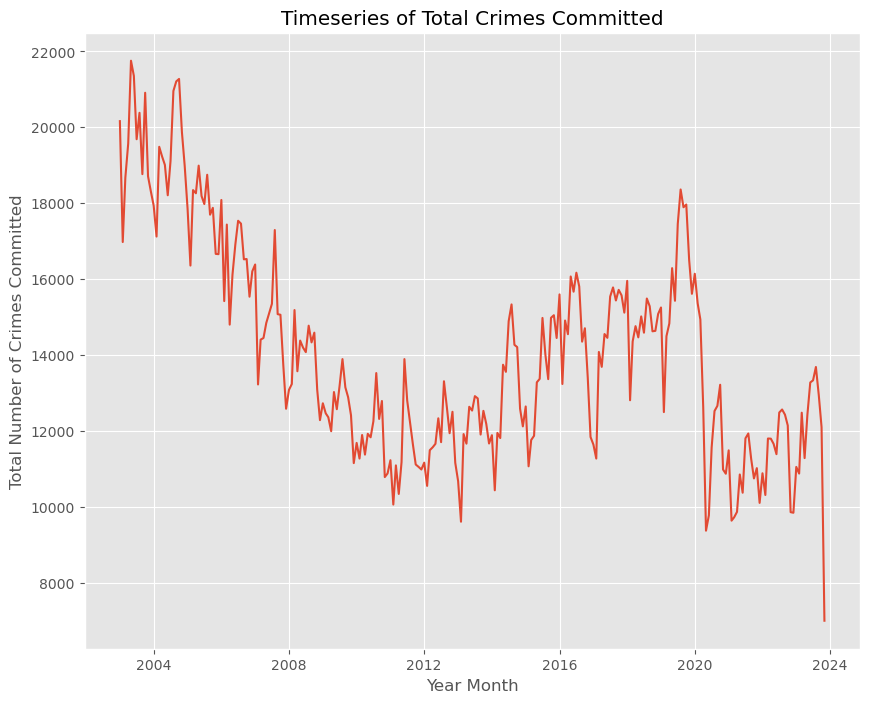

In [43]:
f,axes = plt.subplots(figsize = (10,8))
plot1 = sns.lineplot(data = df_yearmonth, x = 'YearMonth',y='total_crimes_commited')
plot1.set(title = "Timeseries of Total Crimes Committed")
plot1.set(ylabel = "Total Number of Crimes Committed")
plot1.set(xlabel = "Year Month")

From 2003 till current, we notice that there has been a decrease in total crime rates that have been reported

In [44]:
print(f"The number of crimes committed at the beginning of 2003: {df_yearmonth.loc[0,'total_crimes_commited']}")
print(f"The number of crimes committed at the end of 2023: {df_yearmonth.loc[250,'total_crimes_commited']}")
difference = 100*(abs(df_yearmonth.loc[0,'total_crimes_commited'] - df_yearmonth.loc[250,'total_crimes_commited'])/((df_yearmonth.loc[0,'total_crimes_commited'] + df_yearmonth.loc[250,'total_crimes_commited'])/2))
print(f"Difference : {round(difference,2)}%")

The number of crimes committed at the beginning of 2003: 20164
The number of crimes committed at the end of 2023: 12948
Difference : 43.59%


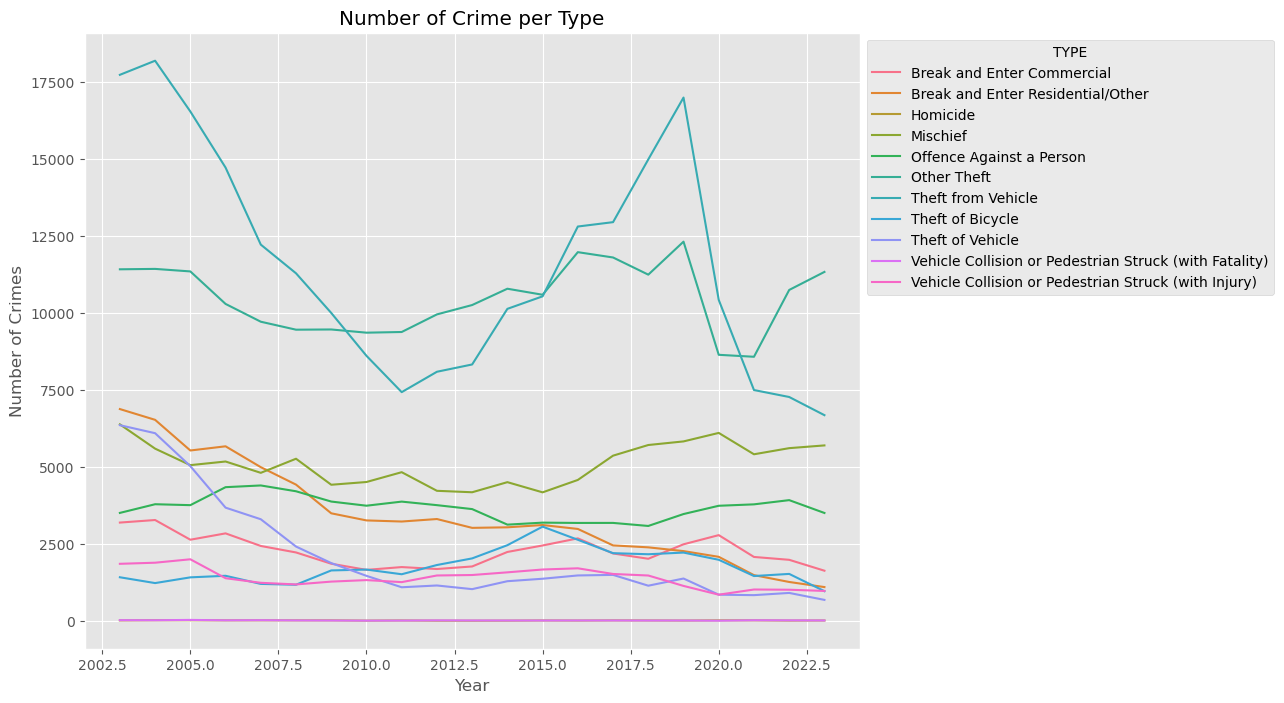

In [45]:
f,axes = plt.subplots(figsize = (10,8))
plot1 = sns.lineplot(data= df_yearmonth2,x="YEAR",y="period_of_day",hue = "TYPE")
plot1.set(title = "Number of Crime per Type")
plot1.set(ylabel = "Number of Crimes")
plot1.set(xlabel = "Year")
sns.move_legend(plot1, "upper left", bbox_to_anchor=(1, 1))

Type of crime occuring

In [46]:
df['TYPE'].unique()

array(['Break and Enter Commercial', 'Break and Enter Residential/Other',
       'Homicide', 'Mischief', 'Offence Against a Person', 'Other Theft',
       'Theft from Vehicle', 'Theft of Bicycle', 'Theft of Vehicle',
       'Vehicle Collision or Pedestrian Struck (with Fatality)',
       'Vehicle Collision or Pedestrian Struck (with Injury)'],
      dtype=object)

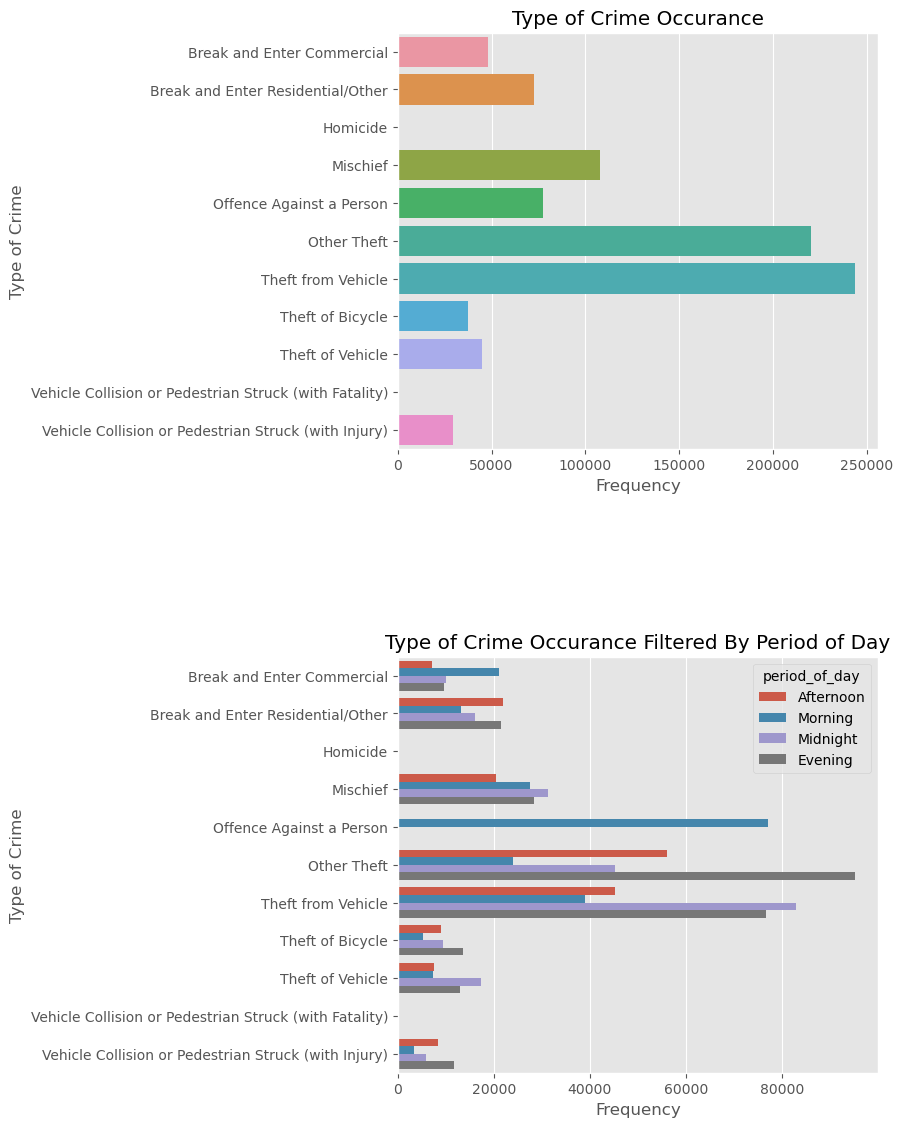

In [47]:
f,axes = plt.subplots(nrows = 2,ncols = 1,figsize = (6,13))


plot1 = sns.countplot(df,y="TYPE",ax = axes[0])
plot1.set(title = 'Type of Crime Occurance')
plot1.set(ylabel = "Type of Crime")
plot1.set(xlabel = "Frequency")

plot2 = sns.countplot(df,y="TYPE",hue = "period_of_day",ax = axes[1])
plot2.set(title = 'Type of Crime Occurance Filtered By Period of Day')
plot2.set(ylabel = "Type of Crime")
plot2.set(xlabel = "Frequency")

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.5, 
                    hspace=0.5)

Monthly Distribution

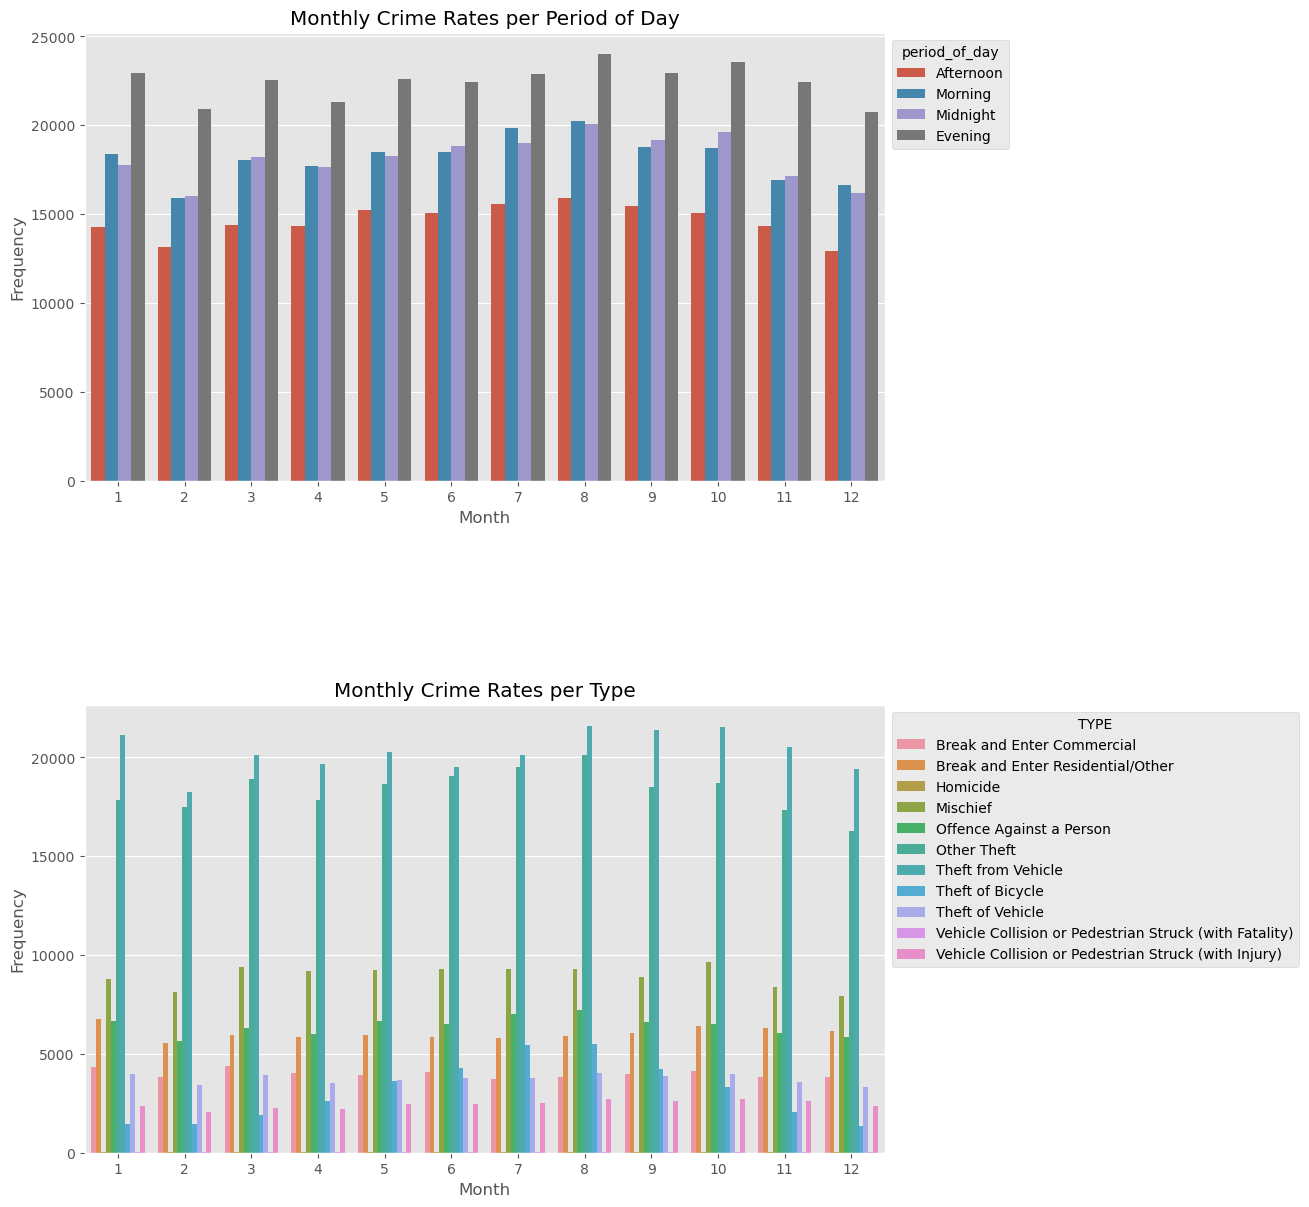

In [48]:
f,axes = plt.subplots(nrows = 2,ncols = 1,figsize = (10,14))
plot1 = sns.countplot(data = df ,x="MONTH",hue = "period_of_day",ax = axes[0])
plot1.set(title = "Monthly Crime Rates per Period of Day")
plot1.set(ylabel = "Frequency")
plot1.set(xlabel = "Month")
sns.move_legend(plot1, "upper left", bbox_to_anchor=(1, 1))


plot2 = sns.countplot(data = df ,x="MONTH",hue = "TYPE",ax = axes[1])
plot2.set(title = "Monthly Crime Rates per Type")
plot2.set(ylabel = "Frequency")
plot2.set(xlabel = "Month")
sns.move_legend(plot2, "upper left", bbox_to_anchor=(1, 1))

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.5, 
                    hspace=0.5)

Export Data to make visual on Tableau

In [49]:
df.to_csv('Crime_Data2.csv')

In [50]:
df_yearmonth.to_csv("Aggregated_Crime_Data2.csv",index= False)
df_yearmonth2.to_csv("Aggregated_Crime_Data2.csv",index= False)